In [1]:
import pandas
pandas.set_option('display.max_columns', None)
import pm4py

import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *
import event_log_transformer

In [2]:
file_path = '../../../data/BPI Challenge 2018.xes'
event_log = pm4py.read_xes(file_path)

/dss/dsshome1/00/ge35xof4/.local/share/virtualenvs/TaskExecutionTimeMining-fMrgpwkZ/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/43809 [00:00<?, ?it/s]

In [3]:
event_log

,success,org:resource,docid_uuid,doctype,subprocess,docid,activity,note,eventid,identity:id,concept:name,lifecycle:transition,time:timestamp,case:young farmer,case:selected_random,case:penalty_AJLP,case:application,case:penalty_amount0,case:program-id,case:penalty_BGKV,case:penalty_AUVP,case:applicant,case:risk_factor,case:small farmer,case:penalty_BGP,case:department,case:penalty_C16,case:penalty_BGK,case:penalty_AVUVP,case:penalty_CC,case:penalty_AVJLP,case:penalty_C9,case:cross_compliance,case:rejected,case:greening,case:penalty_C4,case:penalty_AVGP,case:penalty_ABP,case:penalty_B6,case:penalty_B4,case:penalty_B5,case:penalty_AVBP,case:penalty_B2,case:selected_risk,case:penalty_B3,case:area,case:selected_manually,case:penalty_AGP,case:penalty_B16,case:penalty_GP1,case:basic payment,case:penalty_B5F,case:penalty_V5,case:payment_actual0,case:identity:id,case:amount_applied0,case:redistribution,case:penalty_JLP6,case:penalty_JLP7,case:year,case:penalty_JLP5,case:penalty_JLP2,case:penalty_JLP3,case:number_parcels,case:penalty_JLP1,case:concept:name,case:penalty_amount1,case:payment_actual1,case:amount_applied1,case:penalty_amount2,case:payment_actual2,case:amount_applied2,case:penalty_amount3,case:payment_actual3,case:amount_applied3
0,True,0;n/a,CD3DC291-76C6-420A-B3F1-7C808970915B,Payment application,Application,-18008611495569447,mail income,none,null,510B5333-731A-40FD-B7D6-FC149E50E961,mail income,complete,2015-05-08 00:00:00+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,False,False,False,2.6994,False,False,False,False,True,False,False,960.35,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,960.35,True,False,False,2015,False,False,False,3,False,8b99873a6136cfa6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,0;n/a,CD3DC291-76C6-420A-B3F1-7C808970915B,Payment application,Application,-18008611495569447,mail valid,none,null,F1DD45EF-80BF-46A5-97D6-CC5886DD2D23,mail valid,complete,2015-05-08 00:00:00+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,False,False,False,2.6994,False,False,False,False,True,False,False,960.35,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,960.35,True,False,False,2015,False,False,False,3,False,8b99873a6136cfa6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,0;n/a,7CB69360-6D10-426F-A426-DDE3E24E4334,Entitlement application,Main,-18008615298673397,mail valid,none,null,AA02CA32-D021-4264-A7CB-660A9D603EFC,mail valid,complete,2015-05-08 00:00:00+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,False,False,False,2.6994,False,False,False,False,True,False,False,960.35,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,960.35,True,False,False,2015,False,False,False,3,False,8b99873a6136cfa6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,True,0;n/a,7CB69360-6D10-426F-A426-DDE3E24E4334,Entitlement application,Main,-18008615298673397,mail valid,none,null,097D1E41-3CDB-4652-ABF1-EAEFC0410FA0,mail valid,complete,2015-05-08 00:00:00+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,False,False,False,2.6994,False,False,False,False,True,False,False,960.35,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,960.35,True,False,False,2015,False,False,False,3,False,8b99873a6136cfa6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,fb5fa8,CCBAA174-CDD7-4D32-892E-F14197C65B8A,Parcel document,Main,-72051858488795160,initialize,none,-72051858488795157,96CBE6E6-9774-4DF8-842B-073F4FDCE2B8,initialize,complete,2015-06-10 11:16:28+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,Fals

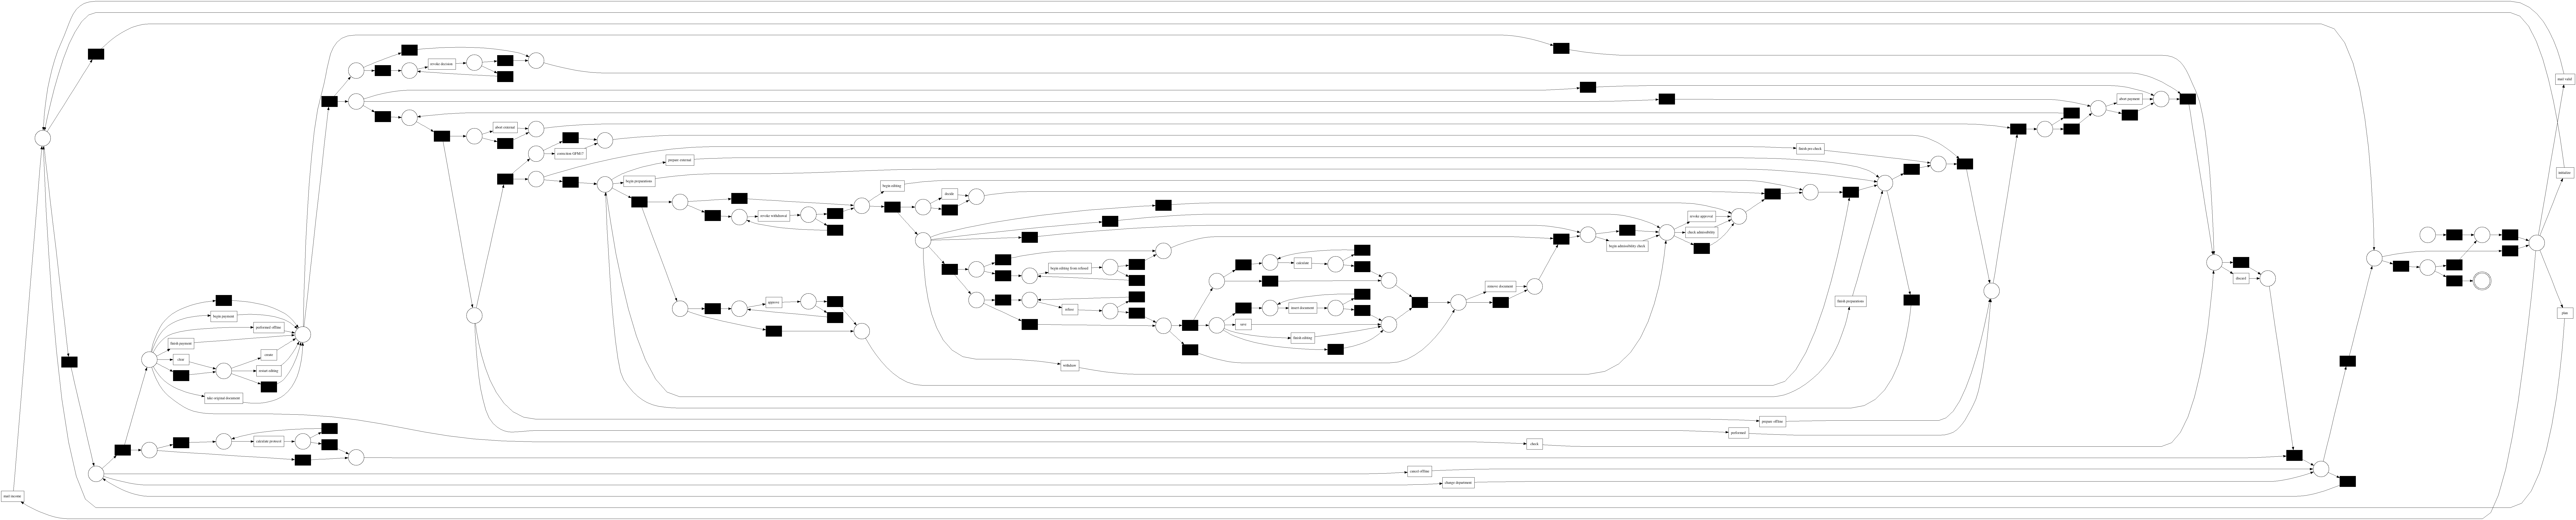

In [4]:
net, im, fm = pm4py.discover_petri_net_inductive(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

In [5]:
len(event_log['case:identity:id'].unique())

43809

In [6]:
len(event_log['case:application'].unique())

43809

In [7]:
event_log['concept:name'].unique()

array(['mail income', 'mail valid', 'initialize', 'begin editing',
       'finish editing', 'save', 'insert document', 'performed',
       'calculate', 'decide', 'begin payment', 'abort payment',
       'finish payment', 'revoke decision', 'check', 'remove document',
       'plan', 'finish preparations', 'begin preparations',
       'prepare external', 'abort external', 'prepare offline',
       'performed offline', 'withdraw', 'revoke withdrawal',
       'begin admissibility check', 'check admissibility', 'approve',
       'take original document', 'refuse', 'begin editing from refused',
       'revoke approval', 'discard', 'cancel offline',
       'change department', 'create', 'restart editing',
       'finish pre-check', 'calculate protocol', 'clear',
       'correction GFM17'], dtype=object)

In [8]:
event_log[event_log['case:application'] == '8b99873a6136cfa6']

,success,org:resource,docid_uuid,doctype,subprocess,docid,activity,note,eventid,identity:id,concept:name,lifecycle:transition,time:timestamp,case:young farmer,case:selected_random,case:penalty_AJLP,case:application,case:penalty_amount0,case:program-id,case:penalty_BGKV,case:penalty_AUVP,case:applicant,case:risk_factor,case:small farmer,case:penalty_BGP,case:department,case:penalty_C16,case:penalty_BGK,case:penalty_AVUVP,case:penalty_CC,case:penalty_AVJLP,case:penalty_C9,case:cross_compliance,case:rejected,case:greening,case:penalty_C4,case:penalty_AVGP,case:penalty_ABP,case:penalty_B6,case:penalty_B4,case:penalty_B5,case:penalty_AVBP,case:penalty_B2,case:selected_risk,case:penalty_B3,case:area,case:selected_manually,case:penalty_AGP,case:penalty_B16,case:penalty_GP1,case:basic payment,case:penalty_B5F,case:penalty_V5,case:payment_actual0,case:identity:id,case:amount_applied0,case:redistribution,case:penalty_JLP6,case:penalty_JLP7,case:year,case:penalty_JLP5,case:penalty_JLP2,case:penalty_JLP3,case:number_parcels,case:penalty_JLP1,case:concept:name,case:penalty_amount1,case:payment_actual1,case:amount_applied1,case:penalty_amount2,case:payment_actual2,case:amount_applied2,case:penalty_amount3,case:payment_actual3,case:amount_applied3
0,True,0;n/a,CD3DC291-76C6-420A-B3F1-7C808970915B,Payment application,Application,-18008611495569447,mail income,none,null,510B5333-731A-40FD-B7D6-FC149E50E961,mail income,complete,2015-05-08 00:00:00+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,False,False,False,2.6994,False,False,False,False,True,False,False,960.35,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,960.35,True,False,False,2015,False,False,False,3,False,8b99873a6136cfa6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,0;n/a,CD3DC291-76C6-420A-B3F1-7C808970915B,Payment application,Application,-18008611495569447,mail valid,none,null,F1DD45EF-80BF-46A5-97D6-CC5886DD2D23,mail valid,complete,2015-05-08 00:00:00+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,False,False,False,2.6994,False,False,False,False,True,False,False,960.35,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,960.35,True,False,False,2015,False,False,False,3,False,8b99873a6136cfa6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,0;n/a,7CB69360-6D10-426F-A426-DDE3E24E4334,Entitlement application,Main,-18008615298673397,mail valid,none,null,AA02CA32-D021-4264-A7CB-660A9D603EFC,mail valid,complete,2015-05-08 00:00:00+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,False,False,False,2.6994,False,False,False,False,True,False,False,960.35,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,960.35,True,False,False,2015,False,False,False,3,False,8b99873a6136cfa6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,True,0;n/a,7CB69360-6D10-426F-A426-DDE3E24E4334,Entitlement application,Main,-18008615298673397,mail valid,none,null,097D1E41-3CDB-4652-ABF1-EAEFC0410FA0,mail valid,complete,2015-05-08 00:00:00+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,False,False,False,2.6994,False,False,False,False,True,False,False,960.35,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,960.35,True,False,False,2015,False,False,False,3,False,8b99873a6136cfa6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,fb5fa8,CCBAA174-CDD7-4D32-892E-F14197C65B8A,Parcel document,Main,-72051858488795160,initialize,none,-72051858488795157,96CBE6E6-9774-4DF8-842B-073F4FDCE2B8,initialize,complete,2015-06-10 11:16:28+00:00,False,False,False,8b99873a6136cfa6,0.0,215,False,False,b3b1bafcf8a5c359,1.0,True,False,e7,False,False,False,False,Fals

In [9]:
event_log[event_log['case:penalty_amount0'] > 0]

,success,org:resource,docid_uuid,doctype,subprocess,docid,activity,note,eventid,identity:id,concept:name,lifecycle:transition,time:timestamp,case:young farmer,case:selected_random,case:penalty_AJLP,case:application,case:penalty_amount0,case:program-id,case:penalty_BGKV,case:penalty_AUVP,case:applicant,case:risk_factor,case:small farmer,case:penalty_BGP,case:department,case:penalty_C16,case:penalty_BGK,case:penalty_AVUVP,case:penalty_CC,case:penalty_AVJLP,case:penalty_C9,case:cross_compliance,case:rejected,case:greening,case:penalty_C4,case:penalty_AVGP,case:penalty_ABP,case:penalty_B6,case:penalty_B4,case:penalty_B5,case:penalty_AVBP,case:penalty_B2,case:selected_risk,case:penalty_B3,case:area,case:selected_manually,case:penalty_AGP,case:penalty_B16,case:penalty_GP1,case:basic payment,case:penalty_B5F,case:penalty_V5,case:payment_actual0,case:identity:id,case:amount_applied0,case:redistribution,case:penalty_JLP6,case:penalty_JLP7,case:year,case:penalty_JLP5,case:penalty_JLP2,case:penalty_JLP3,case:number_parcels,case:penalty_JLP1,case:concept:name,case:penalty_amount1,case:payment_actual1,case:amount_applied1,case:penalty_amount2,case:payment_actual2,case:amount_applied2,case:penalty_amount3,case:payment_actual3,case:amount_applied3
52,True,0;n/a,20DC5603-102C-4D12-8A77-1C9211AC99A5,Payment application,Application,-18008611496121228,mail income,none,null,00F76F16-4E65-4282-94B5-58F3AF7BD0F8,mail income,complete,2015-05-08 00:00:00+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,ae8636c3e41e2eb1,1.0,False,False,d4,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,True,False,False,93.5478,False,False,False,False,True,False,False,28170.75,82CD436C-07E4-43A2-99B4-888BAA45D4CF,28192.23,True,False,False,2015,False,False,False,16,False,d038e6a5fcaed7a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,True,0;n/a,038E58E3-9C74-443C-B506-8C921EED8E54,Entitlement application,Main,-18008615298950832,mail valid,none,null,11F70E83-9957-4422-A740-1965E20DC61C,mail valid,complete,2015-05-12 00:00:00+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,ae8636c3e41e2eb1,1.0,False,False,d4,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,True,False,False,93.5478,False,False,False,False,True,False,False,28170.75,82CD436C-07E4-43A2-99B4-888BAA45D4CF,28192.23,True,False,False,2015,False,False,False,16,False,d038e6a5fcaed7a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,True,0;n/a,20DC5603-102C-4D12-8A77-1C9211AC99A5,Payment application,Application,-18008611496121228,mail valid,none,null,4DE3AA5C-EBEA-43B3-8384-8CD7853C5D9D,mail valid,complete,2015-05-12 00:00:00+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,ae8636c3e41e2eb1,1.0,False,False,d4,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,True,False,False,93.5478,False,False,False,False,True,False,False,28170.75,82CD436C-07E4-43A2-99B4-888BAA45D4CF,28192.23,True,False,False,2015,False,False,False,16,False,d038e6a5fcaed7a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,True,0;n/a,038E58E3-9C74-443C-B506-8C921EED8E54,Entitlement application,Main,-18008615298950832,mail valid,none,null,E42A41C4-88BB-4409-BC22-9FC530994EDF,mail valid,complete,2015-05-12 00:00:00+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,ae8636c3e41e2eb1,1.0,False,False,d4,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,True,False,False,93.5478,False,False,False,False,True,False,False,28170.75,82CD436C-07E4-43A2-99B4-888BAA45D4CF,28192.23,True,False,False,2015,False,False,False,16,False,d038e6a5fcaed7a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,True,Document processing automaton,FE94083C-121F-4374-BC20-A01BEDB3D131,Parcel document,Main,-18008662112586037,initialize,none,-18008662112585595,A01E11F9-FCEA-41A7-9F6B-6D692DD0DE47,initialize,complete,2015-06-12 11:52:18+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,a

In [10]:
event_log[event_log['case:application'] == 'd038e6a5fcaed7a4']

,success,org:resource,docid_uuid,doctype,subprocess,docid,activity,note,eventid,identity:id,concept:name,lifecycle:transition,time:timestamp,case:young farmer,case:selected_random,case:penalty_AJLP,case:application,case:penalty_amount0,case:program-id,case:penalty_BGKV,case:penalty_AUVP,case:applicant,case:risk_factor,case:small farmer,case:penalty_BGP,case:department,case:penalty_C16,case:penalty_BGK,case:penalty_AVUVP,case:penalty_CC,case:penalty_AVJLP,case:penalty_C9,case:cross_compliance,case:rejected,case:greening,case:penalty_C4,case:penalty_AVGP,case:penalty_ABP,case:penalty_B6,case:penalty_B4,case:penalty_B5,case:penalty_AVBP,case:penalty_B2,case:selected_risk,case:penalty_B3,case:area,case:selected_manually,case:penalty_AGP,case:penalty_B16,case:penalty_GP1,case:basic payment,case:penalty_B5F,case:penalty_V5,case:payment_actual0,case:identity:id,case:amount_applied0,case:redistribution,case:penalty_JLP6,case:penalty_JLP7,case:year,case:penalty_JLP5,case:penalty_JLP2,case:penalty_JLP3,case:number_parcels,case:penalty_JLP1,case:concept:name,case:penalty_amount1,case:payment_actual1,case:amount_applied1,case:penalty_amount2,case:payment_actual2,case:amount_applied2,case:penalty_amount3,case:payment_actual3,case:amount_applied3
52,True,0;n/a,20DC5603-102C-4D12-8A77-1C9211AC99A5,Payment application,Application,-18008611496121228,mail income,none,null,00F76F16-4E65-4282-94B5-58F3AF7BD0F8,mail income,complete,2015-05-08 00:00:00+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,ae8636c3e41e2eb1,1.0,False,False,d4,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,True,False,False,93.5478,False,False,False,False,True,False,False,28170.75,82CD436C-07E4-43A2-99B4-888BAA45D4CF,28192.23,True,False,False,2015,False,False,False,16,False,d038e6a5fcaed7a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,True,0;n/a,038E58E3-9C74-443C-B506-8C921EED8E54,Entitlement application,Main,-18008615298950832,mail valid,none,null,11F70E83-9957-4422-A740-1965E20DC61C,mail valid,complete,2015-05-12 00:00:00+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,ae8636c3e41e2eb1,1.0,False,False,d4,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,True,False,False,93.5478,False,False,False,False,True,False,False,28170.75,82CD436C-07E4-43A2-99B4-888BAA45D4CF,28192.23,True,False,False,2015,False,False,False,16,False,d038e6a5fcaed7a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,True,0;n/a,20DC5603-102C-4D12-8A77-1C9211AC99A5,Payment application,Application,-18008611496121228,mail valid,none,null,4DE3AA5C-EBEA-43B3-8384-8CD7853C5D9D,mail valid,complete,2015-05-12 00:00:00+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,ae8636c3e41e2eb1,1.0,False,False,d4,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,True,False,False,93.5478,False,False,False,False,True,False,False,28170.75,82CD436C-07E4-43A2-99B4-888BAA45D4CF,28192.23,True,False,False,2015,False,False,False,16,False,d038e6a5fcaed7a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,True,0;n/a,038E58E3-9C74-443C-B506-8C921EED8E54,Entitlement application,Main,-18008615298950832,mail valid,none,null,E42A41C4-88BB-4409-BC22-9FC530994EDF,mail valid,complete,2015-05-12 00:00:00+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,ae8636c3e41e2eb1,1.0,False,False,d4,False,False,False,False,False,False,0.0,False,True,False,False,False,False,False,False,False,True,False,False,93.5478,False,False,False,False,True,False,False,28170.75,82CD436C-07E4-43A2-99B4-888BAA45D4CF,28192.23,True,False,False,2015,False,False,False,16,False,d038e6a5fcaed7a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,True,Document processing automaton,FE94083C-121F-4374-BC20-A01BEDB3D131,Parcel document,Main,-18008662112586037,initialize,none,-18008662112585595,A01E11F9-FCEA-41A7-9F6B-6D692DD0DE47,initialize,complete,2015-06-12 11:52:18+00:00,False,False,False,d038e6a5fcaed7a4,12.08,215,False,False,a

In [11]:
event_log['lifecycle:transition'].unique()

array(['complete'], dtype=object)

In [12]:
start_end_event_log = TransformEventLog.start_end_event_log_next(event_log, unique_column='identity:id')

In [13]:
start_end_event_log = TransformEventLog.seconds_in_day(start_end_event_log, 'time:timestamp_start')
start_end_event_log = TransformEventLog.day_of_week(start_end_event_log, 'time:timestamp_start')

In [14]:
start_end_event_log

,success_start,org:resource_start,docid_uuid_start,doctype_start,subprocess_start,docid_start,activity_start,note_start,eventid_start,identity:id_start,concept:name_start,lifecycle:transition_start,time:timestamp_start,case:young farmer_start,case:selected_random_start,case:penalty_AJLP_start,case:application_start,case:penalty_amount0_start,case:program-id_start,case:penalty_BGKV_start,case:penalty_AUVP_start,case:applicant_start,case:risk_factor_start,case:small farmer_start,case:penalty_BGP_start,case:department_start,case:penalty_C16_start,case:penalty_BGK_start,case:penalty_AVUVP_start,case:penalty_CC_start,case:penalty_AVJLP_start,case:penalty_C9_start,case:cross_compliance_start,case:rejected_start,case:greening_start,case:penalty_C4_start,case:penalty_AVGP_start,case:penalty_ABP_start,case:penalty_B6_start,case:penalty_B4_start,case:penalty_B5_start,case:penalty_AVBP_start,case:penalty_B2_start,case:selected_risk_start,case:penalty_B3_start,case:area_start,case:selected_manually_start,case:penalty_AGP_start,case:penalty_B16_start,case:penalty_GP1_start,case:basic payment_start,case:penalty_B5F_start,case:penalty_V5_start,case:payment_actual0_start,case:identity:id_start,case:amount_applied0_start,case:redistribution_start,case:penalty_JLP6_start,case:penalty_JLP7_start,case:year_start,case:penalty_JLP5_start,case:penalty_JLP2_start,case:penalty_JLP3_start,case:number_parcels_start,case:penalty_JLP1_start,case:concept:name,case:penalty_amount1_start,case:payment_actual1_start,case:amount_applied1_start,case:penalty_amount2_start,case:payment_actual2_start,case:amount_applied2_start,case:penalty_amount3_start,case:payment_actual3_start,case:amount_applied3_start,success_complete,org:resource_complete,docid_uuid_complete,doctype_complete,subprocess_complete,docid_complete,activity_complete,note_complete,eventid_complete,identity:id_complete,concept:name_complete,lifecycle:transition_complete,time:timestamp_complete,case:young farmer_complete,case:selected_random_complete,case:penalty_AJLP_complete,case:application_complete,case:penalty_amount0_complete,case:program-id_complete,case:penalty_BGKV_complete,case:penalty_AUVP_complete,case:applicant_complete,case:risk_factor_complete,case:small farmer_complete,case:penalty_BGP_complete,case:department_complete,case:penalty_C16_complete,case:penalty_BGK_complete,case:penalty_AVUVP_complete,case:penalty_CC_complete,case:penalty_AVJLP_complete,case:penalty_C9_complete,case:cross_compliance_complete,case:rejected_complete,case:greening_complete,case:penalty_C4_complete,case:penalty_AVGP_complete,case:penalty_ABP_complete,case:penalty_B6_complete,case:penalty_B4_complete,case:penalty_B5_complete,case:penalty_AVBP_complete,case:penalty_B2_complete,case:selected_risk_complete,case:penalty_B3_complete,case:area_complete,case:selected_manually_complete,case:penalty_AGP_complete,case:penalty_B16_complete,case:penalty_GP1_complete,case:basic payment_complete,case:penalty_B5F_complete,case:penalty_V5_complete,case:payment_actual0_complete,case:identity:id_complete,case:amount_applied0_complete,case:redistribution_complete,case:penalty_JLP6_complete,case:penalty_JLP7_complete,case:year_complete,case:penalty_JLP5_complete,case:penalty_JLP2_complete,case:penalty_JLP3_complete,case:number_parcels_complete,case:penalty_JLP1_complete,case:penalty_amount1_complete,case:payment_actual1_complete,case:amount_applied1_complete,case:penalty_amount2_complete,case:payment_actual2_complete,case:amount_applied2_complete,case:penalty_amount3_complete,case:payment_actual3_complete,case:amount_applied3_complete,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,day_of_week
14841609,True,727350,76723684-37CE-458C-9B52-86063906EF40,Payment application,Application,-18008611495592886,calculate,automatic,-126094993279036166,000007E7-B060-4E4E-BC27-C6D875A063B4,calculate,complete,2015-12-03 16:21:40.606000+00:00,False,False,False,a1cfe706562f6bfb,35.00,215,False,False,e75e966bbaf5b292,1.0,False,F

In [15]:
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'concept:name_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'identity:id_start')
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'org:resource_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'identity:id_start')
start_end_event_log = start_end_event_log.sort_values(by='time:timestamp_start')

In [16]:
start_end_event_log

,success_start,org:resource_start,docid_uuid_start,doctype_start,subprocess_start,docid_start,activity_start,note_start,eventid_start,identity:id_start,concept:name_start,lifecycle:transition_start,time:timestamp_start,case:young farmer_start,case:selected_random_start,case:penalty_AJLP_start,case:application_start,case:penalty_amount0_start,case:program-id_start,case:penalty_BGKV_start,case:penalty_AUVP_start,case:applicant_start,case:risk_factor_start,case:small farmer_start,case:penalty_BGP_start,case:department_start,case:penalty_C16_start,case:penalty_BGK_start,case:penalty_AVUVP_start,case:penalty_CC_start,case:penalty_AVJLP_start,case:penalty_C9_start,case:cross_compliance_start,case:rejected_start,case:greening_start,case:penalty_C4_start,case:penalty_AVGP_start,case:penalty_ABP_start,case:penalty_B6_start,case:penalty_B4_start,case:penalty_B5_start,case:penalty_AVBP_start,case:penalty_B2_start,case:selected_risk_start,case:penalty_B3_start,case:area_start,case:selected_manually_start,case:penalty_AGP_start,case:penalty_B16_start,case:penalty_GP1_start,case:basic payment_start,case:penalty_B5F_start,case:penalty_V5_start,case:payment_actual0_start,case:identity:id_start,case:amount_applied0_start,case:redistribution_start,case:penalty_JLP6_start,case:penalty_JLP7_start,case:year_start,case:penalty_JLP5_start,case:penalty_JLP2_start,case:penalty_JLP3_start,case:number_parcels_start,case:penalty_JLP1_start,case:concept:name,case:penalty_amount1_start,case:payment_actual1_start,case:amount_applied1_start,case:penalty_amount2_start,case:payment_actual2_start,case:amount_applied2_start,case:penalty_amount3_start,case:payment_actual3_start,case:amount_applied3_start,success_complete,org:resource_complete,docid_uuid_complete,doctype_complete,subprocess_complete,docid_complete,activity_complete,note_complete,eventid_complete,identity:id_complete,concept:name_complete,lifecycle:transition_complete,time:timestamp_complete,case:young farmer_complete,case:selected_random_complete,case:penalty_AJLP_complete,case:application_complete,case:penalty_amount0_complete,case:program-id_complete,case:penalty_BGKV_complete,case:penalty_AUVP_complete,case:applicant_complete,case:risk_factor_complete,case:small farmer_complete,case:penalty_BGP_complete,case:department_complete,case:penalty_C16_complete,case:penalty_BGK_complete,case:penalty_AVUVP_complete,case:penalty_CC_complete,case:penalty_AVJLP_complete,case:penalty_C9_complete,case:cross_compliance_complete,case:rejected_complete,case:greening_complete,case:penalty_C4_complete,case:penalty_AVGP_complete,case:penalty_ABP_complete,case:penalty_B6_complete,case:penalty_B4_complete,case:penalty_B5_complete,case:penalty_AVBP_complete,case:penalty_B2_complete,case:selected_risk_complete,case:penalty_B3_complete,case:area_complete,case:selected_manually_complete,case:penalty_AGP_complete,case:penalty_B16_complete,case:penalty_GP1_complete,case:basic payment_complete,case:penalty_B5F_complete,case:penalty_V5_complete,case:payment_actual0_complete,case:identity:id_complete,case:amount_applied0_complete,case:redistribution_complete,case:penalty_JLP6_complete,case:penalty_JLP7_complete,case:year_complete,case:penalty_JLP5_complete,case:penalty_JLP2_complete,case:penalty_JLP3_complete,case:number_parcels_complete,case:penalty_JLP1_complete,case:penalty_amount1_complete,case:payment_actual1_complete,case:amount_applied1_complete,case:penalty_amount2_complete,case:payment_actual2_complete,case:amount_applied2_complete,case:penalty_amount3_complete,case:payment_actual3_complete,case:amount_applied3_complete,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,day_of_week,abort external,abort payment,approve,begin admissibility check,begin editing,begin editing from refused,begin payment,begin preparations,calculate,calculate protocol,cancel offline,change department,check,check admissibility,clear,correction GFM17,create,decide,discard,finish editing,finish payment,finish pre-check,finish

In [17]:
start_end_event_log.shape

(2470455, 361)

In [18]:
train, test = pm4py.ml.split_train_test(start_end_event_log)

In [19]:
train.shape

(1967374, 361)

In [20]:
test.shape

(503081, 361)

In [21]:
train.to_csv('../transformed_event_logs/BPIC_2018_start_end_train.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
train.to_pickle('../transformed_event_logs/BPIC_2018_start_end_train.pickle')

In [22]:
test.to_csv('../transformed_event_logs/BPIC_2018_start_end_test.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
test.to_pickle('../transformed_event_logs/BPIC_2018_start_end_test.pickle')